# Netflix Userbase - Exploratory Data Analysis

## About the project

## Dataset Info

This dataset was downloaded from kaggle and it doesn't represent the actual Netflix Userbase but a sample and synthetic data to be used for analysis.

Click the link below to know more about the dataset.

[Netflix Userbase Dataset](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

Let's import all the neccessary libraries first.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from urllib.request import urlretrieve 
!pip install opendatasets --upgrade --quiet
import opendatasets as od
!pip install jovian --upgrade --quiet

In [3]:
netflix_userbase_raw_df = pd.read_csv("Netflix_Userbase.csv")
#converting a csv file to a pandas dataframe

# Data Preparation and Cleaning

Let's create a dataframe of our csv file and name it as "netflix_userbase_raw_df" to indicate that this is the raw and unprocessed data that we intially started with. Then we'll create a copy of this original dataframe and name it "netflix_userbase_df" and we'll perform all the data preparation, cleaning and modification on this dataframe and keep the original dataframe unchanged.

In [4]:
netflix_userbase_raw_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [5]:
netflix_userbase_df = netflix_userbase_raw_df.copy()
#creating a copy of the original dataframe

In [6]:
netflix_userbase_df.isnull().any()
#checking for null values

User ID              False
Subscription Type    False
Monthly Revenue      False
Join Date            False
Last Payment Date    False
Country              False
Age                  False
Gender               False
Device               False
Plan Duration        False
dtype: bool

In [7]:
netflix_userbase_df.sample(n = 10)
#looking at a sample to understand the data better

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1847,1848,Standard,11,01-08-22,10-07-23,Mexico,49,Male,Laptop,1 Month
1660,1661,Basic,13,10-08-22,05-07-23,United States,49,Female,Laptop,1 Month
1414,1415,Basic,11,17-10-22,03-07-23,Italy,32,Female,Smart TV,1 Month
1668,1669,Premium,10,14-09-22,05-07-23,Spain,48,Male,Tablet,1 Month
2363,2364,Premium,13,26-08-22,11-07-23,Canada,28,Female,Smart TV,1 Month
1801,1802,Premium,12,15-08-22,07-07-23,Brazil,30,Male,Smartphone,1 Month
1505,1506,Premium,10,29-06-22,05-07-23,Spain,47,Male,Smartphone,1 Month
1731,1732,Standard,12,14-08-22,07-07-23,Spain,33,Male,Smartphone,1 Month
2148,2149,Premium,14,30-07-22,09-07-23,Spain,42,Male,Smart TV,1 Month
866,867,Basic,13,17-07-22,30-06-23,Canada,49,Female,Tablet,1 Month


In [8]:
netflix_userbase_df.drop(["Last Payment Date", "Plan Duration"], inplace = True, 
                         axis = 1, 
                         errors = "ignore")
#removing the columns that are not useful to me

netflix_userbase_df.rename(columns = {"Subscription Type" : "Subscription", "Monthly Revenue" : "Monthly Revenue($)"},
                           inplace = True)
#renaming certain columns for my convenience

In [9]:
netflix_userbase_df

,User ID,Subscription,Monthly Revenue($),Join Date,Country,Age,Gender,Device
0,1,Basic,10,15-01-22,United States,28,Male,Smartphone
1,2,Premium,15,05-09-21,Canada,35,Female,Tablet
2,3,Standard,12,28-02-23,United Kingdom,42,Male,Smart TV
3,4,Standard,12,10-07-22,Australia,51,Female,Laptop
4,5,Basic,10,01-05-23,Germany,33,Male,Smartphone
...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,Spain,28,Female,Smart TV
2496,2497,Basic,15,04-08-22,Spain,33,Female,Smart TV
2497,2498,Standard,12,09-08-22,United States,38,Male,Laptop
2498,2499,Standard,13,12-08-22,Canada,48,Female,Tablet


In [10]:
netflix_userbase_df.describe()
#the .describe() function helps to get a statistical view of the numerical values.

,User ID,Monthly Revenue($),Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


We can see that this Dataset is in a usable form now. The dataset had no null values, we dropped the columns we didn't need for the analysis to keep it clean and simple and we renamed some columns for our convience and organization. Looking at the description of the columns above, it seems like the data is neat and usable and there are no errors in the values of age and monthly revenue.

# Exploratory Analysis and Visualization

Before we do our analysis and form conclusions, it's best to look at the data visually to understand the distribution a lot better. Let's look at how the userbase of Netflix compares between the two genders, different countries etc.

### Subscription

In [11]:
subscription = netflix_userbase_df["Subscription"].value_counts()
subscription

Basic       999
Standard    768
Premium     733
Name: Subscription, dtype: int64

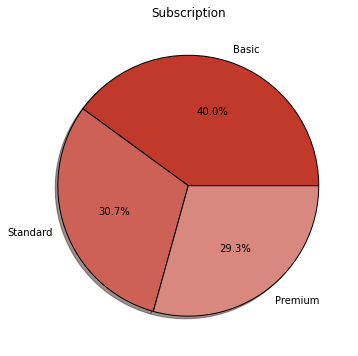

In [12]:
plt.figure(figsize = (12,6))

plt.title("Subscription")

name = subscription.index
colors = ("#C0392B", "#CD6155", "#D98880")

plt.pie(subscription, labels = name, colors = colors, autopct = "%1.1f%%",
        wedgeprops = {"edgecolor" : "black"}, shadow = True);

It's clear that people worldwide are inclined towards the basic monthly plan of Netflix and there's almost equal distribution of preference towards the premium and the standard plan. 

Since the difference isn't huge, it shows that all 3 monthly plans are valuable to people of different needs.

### Monthly Revenue

In [13]:
sns.set_style("darkgrid")

In [14]:
grouped_df = netflix_userbase_df.groupby('Country')['Monthly Revenue($)'].sum().reset_index()

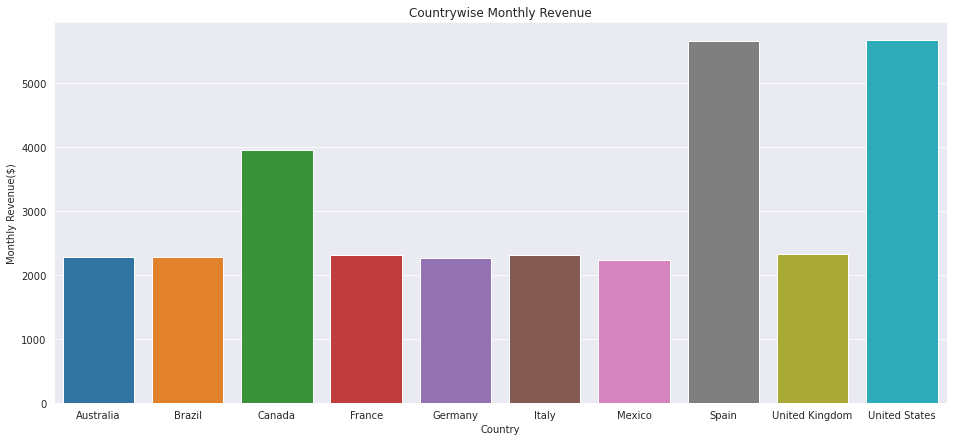

In [15]:
plt.figure(figsize = (16,7))
plt.title("Countrywise Monthly Revenue")
sns.barplot(x = grouped_df.Country, y = grouped_df["Monthly Revenue($)"]);

Looking at this bar plot, it's clear to us that Netflix is especially popular in US, Canada and Spain, followed by other nations. This could potentially indicate a growth oppurtunity in other european nations and countries not listed here as well.

### Age

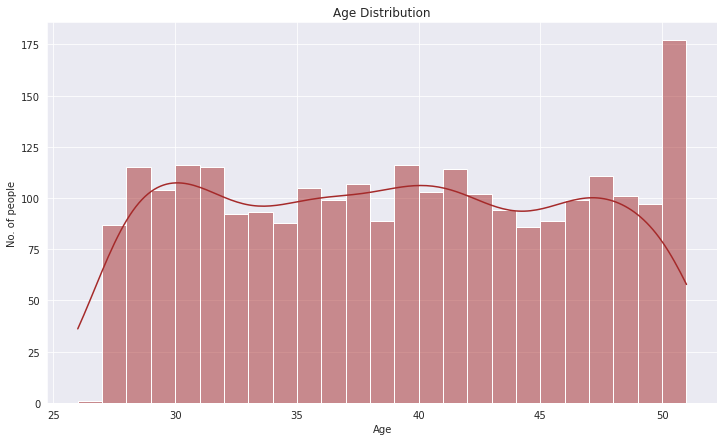

In [60]:
plt.figure(figsize = (12,7))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("No. of people")
sns.histplot(x = netflix_userbase_df.Age, bins = 25, color  = "brown", kde = True);

This histogram shows that the people tend to enjoy Netflix after they're past 27 years of age and a lot of people enjoy the service in their 50s. 

### Gender

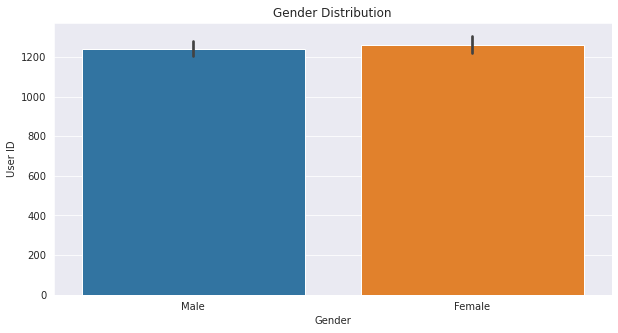

In [17]:
plt.figure(figsize = (10,5))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("No. of People")
sns.barplot(x = netflix_userbase_df.Gender, y = netflix_userbase_df["User ID"]);

There's almost an identical distribution when it comes to Male and Female audience of Netflix, which means both genders enjoy the service equally as much.

### Devices

In [18]:
devices = netflix_userbase_df["Device"].value_counts().reset_index()
devices

,index,Device
0,Laptop,636
1,Tablet,633
2,Smartphone,621
3,Smart TV,610


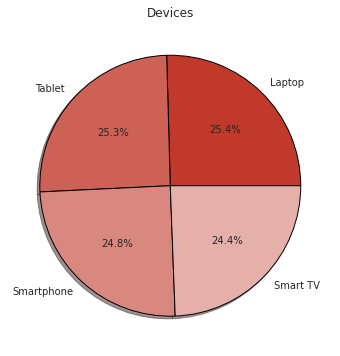

In [19]:
plt.figure(figsize = (12,6))

plt.title("Devices")

names = devices["index"]
colors = ("#C0392B", "#CD6155", "#D98880", "#E6B0AA")

plt.pie(devices["Device"], labels = names, colors = colors, autopct = "%1.1f%%",
        wedgeprops = {"edgecolor" : "black"}, shadow = True);

Similar to the Genders, the watch pattern between the popular devices is also quite identical meaning there's not a real preference when it comes to watching on a big or small screen or in a specific environment.

# Asking and answering questions

We've analyzed each row to understand the spread of Netflix Userbase among different Ages, Countries and Genders, and also how the behaviour of the users like how which plan they choose and which devices they prefer to watch on. Now let's try to understand this data better by asking some specfic questions using data frame operations and visualizations.

#### How many Male and Female participants are present in the dataset?

In [20]:
netflix_userbase_df["Gender"].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [21]:
print("Number of male participants in the dataset are {}.".format(netflix_userbase_df["Gender"].value_counts()[1]))
print("Number of female participants in the dataset are {}.".format(netflix_userbase_df["Gender"].value_counts()[0]))

Number of male participants in the dataset are 1243.
Number of female participants in the dataset are 1257.


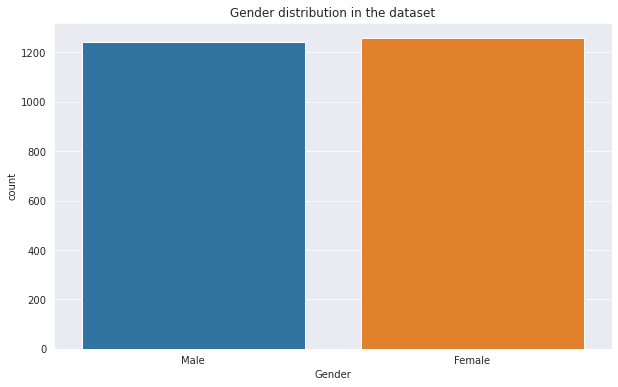

In [22]:
plt.figure(figsize = (10,6))
plt.title("Gender distribution in the dataset")
sns.countplot(data = netflix_userbase_df, x = "Gender");

#### Let's see if there's any relation between the genders and the devices they use.

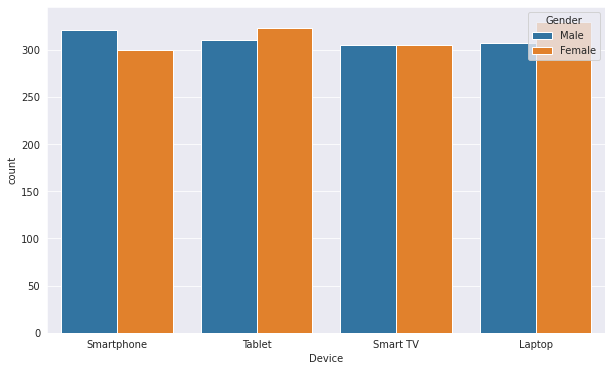

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(data = netflix_userbase_df, x = "Device", hue = "Gender");

There's not a lot of difference in device preference when it comes to both genders, but we could say that the female audiences tend to prefer tablets and laptops slightly more than males and the male audience are comfortable with smartphones as well.

#### Let's see how the revenue distributes among different genders

In [24]:
gender_revenue_agg_df = netflix_userbase_df.groupby("Gender")["Monthly Revenue($)"].sum().reset_index()
gender_revenue_agg_df

,Gender,Monthly Revenue($)
0,Female,15736
1,Male,15535


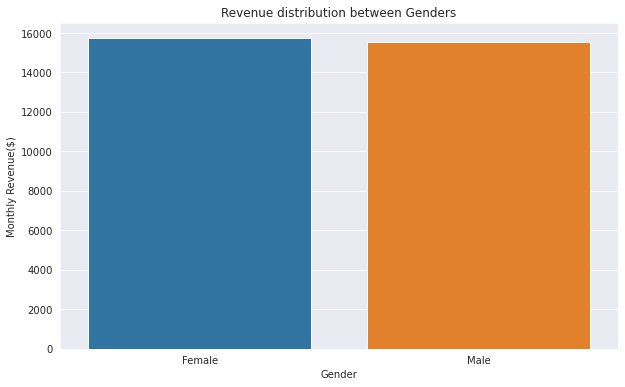

In [25]:
plt.figure(figsize = (10,6))
plt.title("Revenue distribution between Genders")
sns.barplot(x = gender_revenue_agg_df["Gender"], y = gender_revenue_agg_df["Monthly Revenue($)"]);

From this bar plot, we can see Netflix generates similar revenue from both the Genders.

#### Now, let's look at how much revenue each monthly plan generates

In [26]:
plans_agg_df = netflix_userbase_df.groupby("Subscription")["Monthly Revenue($)"].sum().reset_index()
plans_agg_df

,Subscription,Monthly Revenue($)
0,Basic,12469
1,Premium,9229
2,Standard,9573


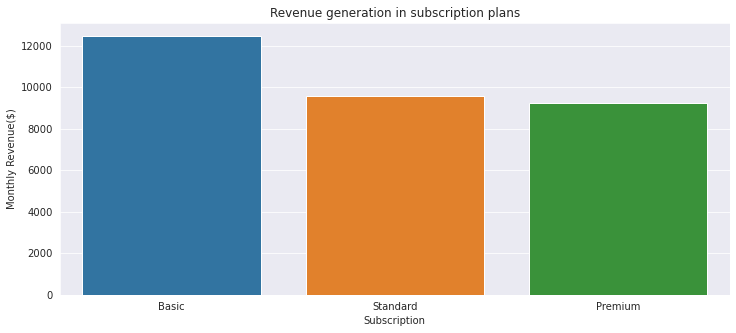

In [27]:
plt.figure(figsize = (12,5))
plt.title("Revenue generation in subscription plans")
plt.xlabel("Type of subscription")
plan_order = ["Basic", "Standard", "Premium"]
sns.barplot(x = plans_agg_df["Subscription"], y = plans_agg_df["Monthly Revenue($)"], order = plan_order);

It's evident that the Basic plan is what generates the most amount of revenue for Netflix and by a significant amount.

In [28]:
country_avg_age_df = netflix_userbase_df.groupby("Country")["Age"].mean().reset_index()
country_avg_age_df

,Country,Age
0,Australia,38.355191
1,Brazil,38.327869
2,Canada,38.697161
3,France,39.109290
4,Germany,39.038251
5,Italy,38.551913
6,Mexico,38.830601
7,Spain,38.800443
8,United Kingdom,39.191257
9,United States,38.926829


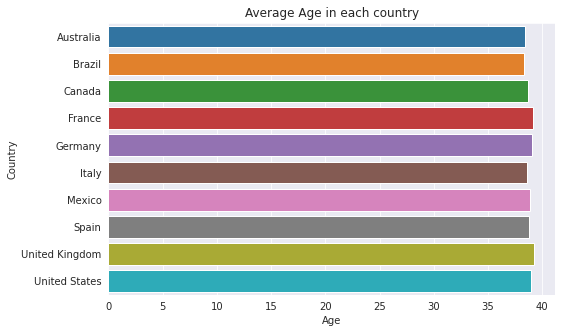

In [32]:
plt.figure(figsize = (8,5))
plt.title("Average Age in each country")
sns.barplot(y = country_avg_age_df["Country"], x = country_avg_age_df["Age"]);

Now, it's clear that the avg age in each country is also pretty identical.

#### Let's look at how the subscribers increased over time for netflix

In [85]:
date_gender_df = netflix_userbase_df.groupby("Join Date")["Gender"].size().reset_index(name='Count')
date_gender_df['Cumulative Count'] = date_gender_df['Count'].cumsum()
date_gender_df

,Join Date,Count,Cumulative Count
0,01-03-22,2,2
1,01-05-23,1,3
2,01-06-22,3,6
3,01-07-22,19,25
4,01-08-22,13,38
...,...,...,...
295,30-11-21,1,2455
296,31-05-22,3,2458
297,31-07-22,12,2470
298,31-08-22,10,2480


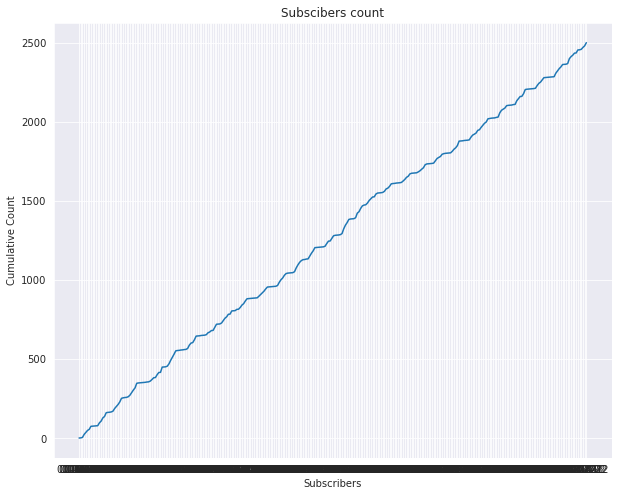

In [97]:
plt.figure(figsize = (10,8))
plt.title("Subscibers count")
sns.lineplot(x='Join Date', y='Cumulative Count', data= date_gender_df)
plt.xlabel("Subscribers")
plt.ylabel("Cumulative Count");

It seems that the Netflix subscribers increased over time in a steady manner without any major increases or decreases.

#### Let's see how the revenue spreads across different ages

In [93]:
age_revenue_df = netflix_userbase_df.groupby("Age")["Monthly Revenue($)"].sum().reset_index()
age_revenue_df

,Age,Monthly Revenue($)
0,26,15
1,27,1101
2,28,1438
3,29,1317
4,30,1475
5,31,1413
6,32,1156
7,33,1161
8,34,1091
9,35,1325


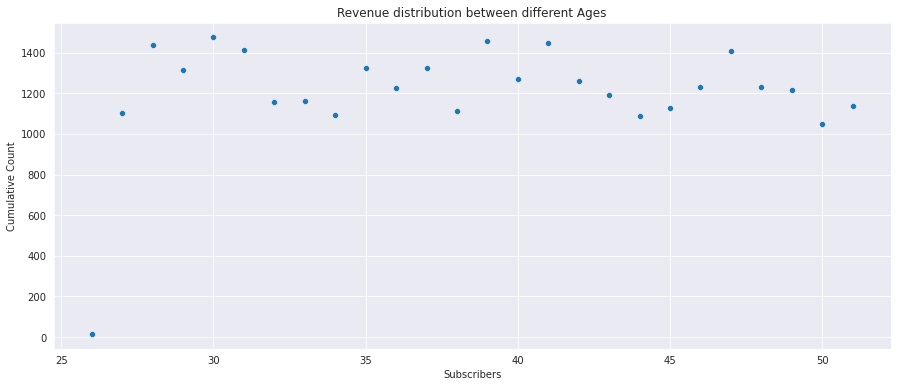

In [96]:
plt.figure(figsize = (15,6))
plt.title("Revenue distribution between different Ages")
sns.scatterplot(x='Age', y='Monthly Revenue($)', data= age_revenue_df)
plt.xlabel("Subscribers")
plt.ylabel("Cumulative Count");

So it looks like people with 26 years generate almost negligible revenue in this data and the the revenue ranges between 1000 and 1500 dollars for the rest of the ages. 

# Inferences and Conclusions

Let's now conclude the insights about the dataset in a summarized format.

- After looking at the dataset visually, it seems to be distributed equally especially in terms of Genders, device preferences and Age.

- The usage pattern is quite inclined towards countries like US and Spain, with Canada following up and other countries not being as popular yet.

- When it comes to Subscription models, the Basic subscription which is also the cheapest tends to be the most popular with 40% of the population using it. 

- The other 2 models, "standard" and "premium" are not as popular as we'd expect with both of them being used at the same rate.

- The female audience enjoys watching on Laptops and Tablets and would rather not use smartphones as much as males and the opposite being true for the male audience.

- There seems to be a high adoption rate among people in their 50s which could be because of slow paced life where they have a lot more time in their hands and not a lot of stress and chores to deal with.

- The subscriber count for netflix seems to have a really high steady growth with no major declines and increases.

- Different age groups generate almost similar amount of revenue for Netflix with the exception of people aged 26, but it could be because of incomplete data since there seems to be only a single value for that age.

- Netflix could change the pricing of the subscription models to increase revenue, by making the basic plan slightly expensive or making the premium model seem more valuable by introducing new pricing structure of models.
